In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train.reshape(-1,28,28,1),y_train,
                  epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 23s 8ms/step - loss: 0.3564 - accuracy: 0.8890 - val_loss: 0.0805 - val_accuracy: 0.9772
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1079 - accuracy: 0.9690 - val_loss: 0.0531 - val_accuracy: 0.9852
Epoch 3/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0780 - accuracy: 0.9773 - val_loss: 0.0445 - val_accuracy: 0.9869
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0626 - accuracy: 0.9821 - val_loss: 0.0442 - val_accuracy: 0.9884
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0542 - accuracy: 0.9851 - val_loss: 0.0392 - val_accuracy: 0.9893
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0431 - accuracy: 0.9874 - val_loss: 0.0385 - val_accuracy: 0.9894
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0378 - accuracy: 0.9897 - val_loss: 0.0410 - val_accuracy: 0.9898
Epoch

In [ ]:
test_loss,test_accuracy=model.evaluate(x_test.reshape(-1,28,28,1),y_test)
print(f'Test accuracy:{test_accuracy*100:.2f}%)')

313/313 [==============================] - 1s 3ms/step - loss: 0.0298 - accuracy: 0.9915
Test accuracy:99.15%)


313/313 [==============================] - 1s 2ms/step


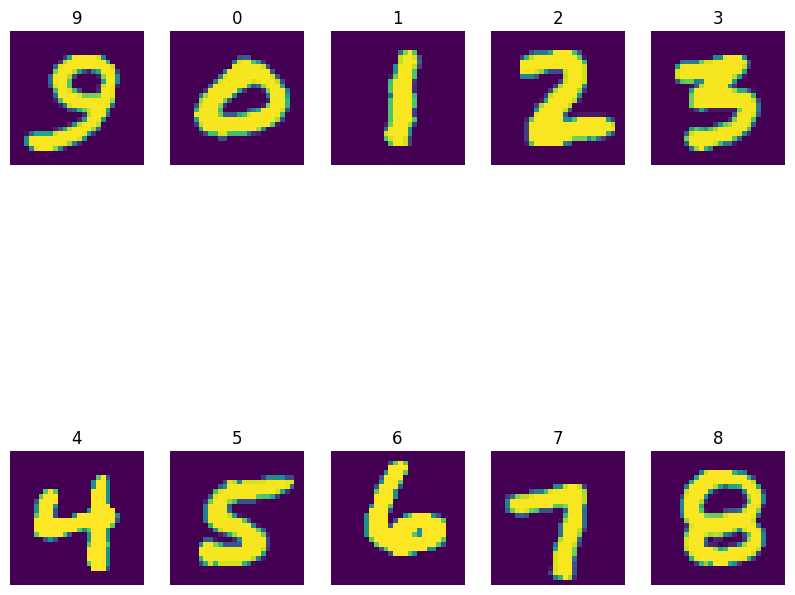

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pred=model.predict(x_test)

plt.figure(figsize=(10,10))
x=np.random.randint(0,10000)

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[x+i])
  plt.title(np.argmax(pred[x+i]))
  plt.axis('off')

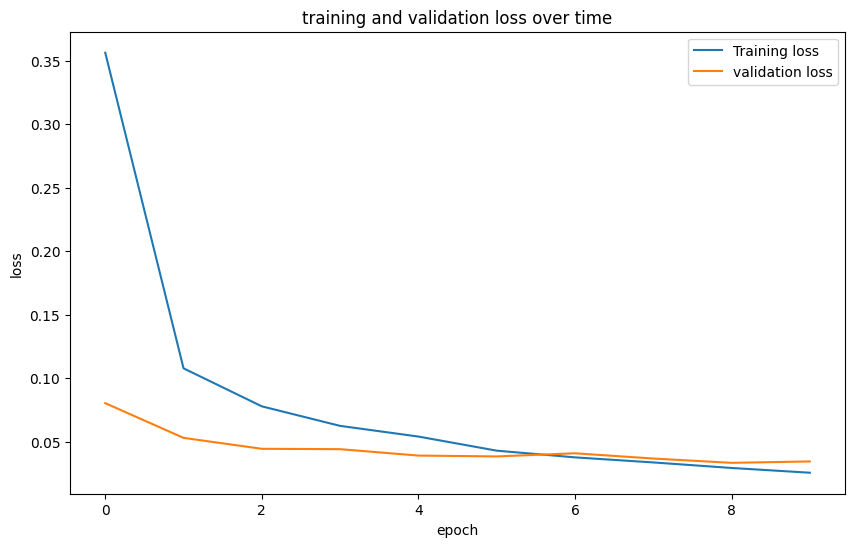

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel("epoch")
plt.ylabel('loss')
plt.legend()
plt.title('training and validation loss over time')
plt.show()